In [1]:
# Import numpy for numerical operations
import numpy as np 

# Import pandas for data manipulation
import pandas as pd 

# Import matplotlib for plotting
import matplotlib.pyplot as plt 

# Import rcParams from matplotlib for customizing plot settings
from matplotlib import rcParams 

# Import scikit-learn for machine learning tools
import sklearn 

# Import KMeans algorithm for clustering
from sklearn.cluster import KMeans 

# Import Axes3D for 3D plotting
from mpl_toolkits.mplot3d import Axes3D 

# Import scale for data normalization
from sklearn.preprocessing import scale 

# Import metrics from scikit-learn for evaluating models
import sklearn.metrics as am 

# Import datasets module for sample datasets
from sklearn import datasets 

# Import confusion matrix and classification report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report 

# Import seaborn for statistical data visualization
import seaborn as sns


In [2]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline 

# Set default figure size for matplotlib plots
rcParams['figure.figsize'] = 7, 4


In [3]:
# Load the iris dataset
iris = datasets.load_iris() 

# Normalize the data (feature scaling)
X = scale(iris.data) 

# Convert target labels to a DataFrame
y = pd.DataFrame(iris.target) 

# Get the feature names from the iris dataset
variable_names = iris.feature_names 

# Display the first 10 rows of the scaled data
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [4]:
# to suppress memory leak warning: 

import os 

# Set the environment variable to use only one thread
os.environ['OMP_NUM_THREADS'] = '1'

In [5]:
# Cluster the data 

# sets the number of centroids and randomizes centroid positions 
clustering = KMeans(n_clusters=3, random_state=5, n_init=10) 

# Fit the clustering model to the scaled data
clustering.fit(X) 

KMeans(n_clusters=3, n_init=10, random_state=5)

In [6]:
# Create a DataFrame from the iris dataset features
iris_df = pd.DataFrame(iris.data) 

# Assign column names to the DataFrame
iris_df.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"] 

# Rename the target column in the DataFrame
y.columns = ["Targets"]

Text(0.5, 1.0, 'K-Means Classification')

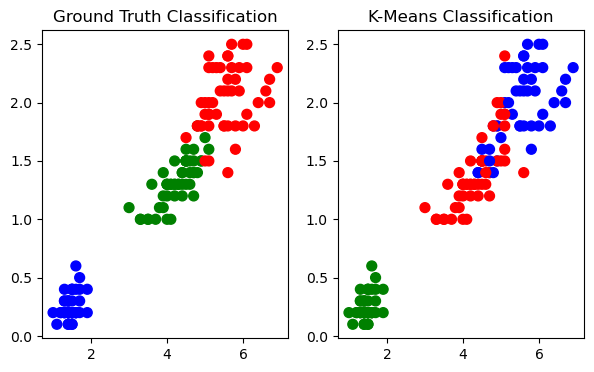

In [7]:
# Relabel the clustering results to match the original class labels
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64) 

# Create the first subplot in a 1x2 grid
plt.subplot(1, 2, 1) 

# Define the color theme for plotting (mapping classes to colors)
color_theme = np.array(['blue', 'green', 'red']) 

# Plot the ground truth classification using Petal_Length and Petal_Width
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50) 
plt.title("Ground Truth Classification") 

# Create the second subplot in a 1x2 grid
plt.subplot(1, 2, 2) 

# Plot the K-Means classification using Petal_Length and Petal_Width
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50) 
plt.title("K-Means Classification")


In [8]:
# Print the classification report comparing true labels with clusters
print(classification_report(y, relabel)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

